In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset 
from Covonutional_neural_network.modelUttils.augment_dataset import apply_combined_noise, add_gaussian_noise

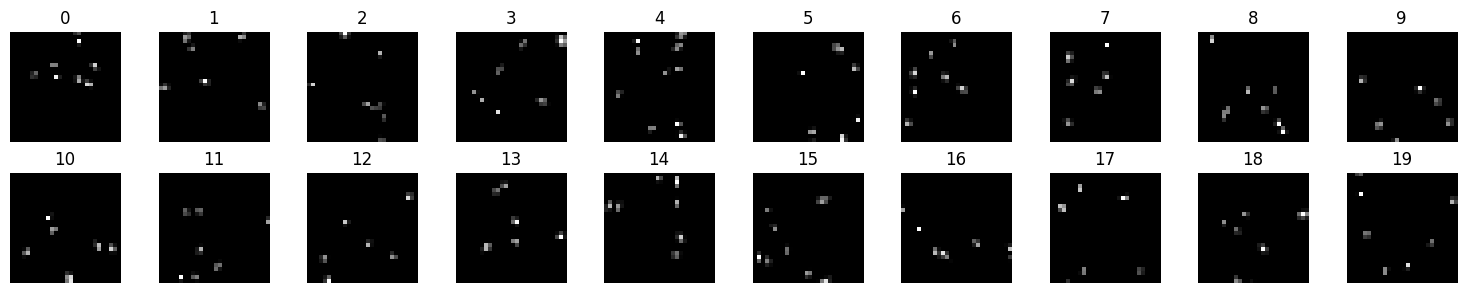

In [13]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = apply_combined_noise(np.zeros((28, 28)))
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


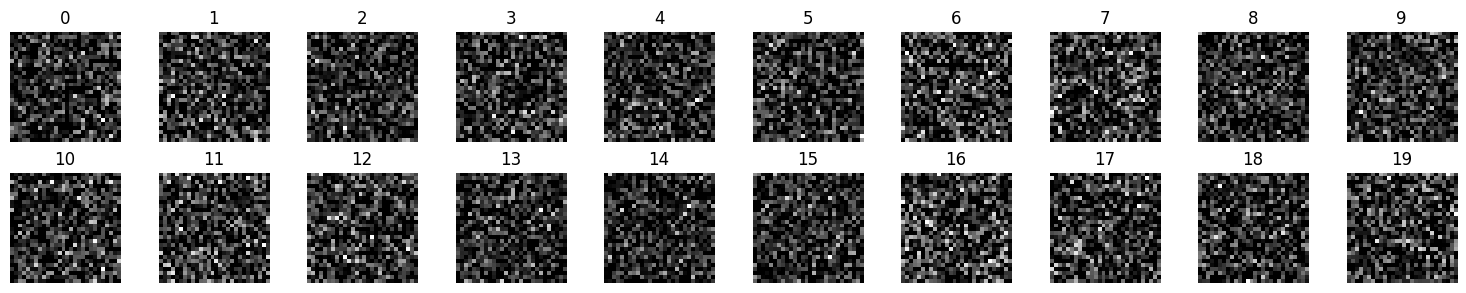

In [14]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = add_gaussian_noise(np.zeros((28, 28)))
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


In [15]:
folder_paths = [
    # 'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\(',
    # 'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\)',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\0',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\1',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\2',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\3',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\4',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\5',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\6',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\7',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\8',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\9',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\add','C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\dec','C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\div',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\eq',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\mul',"C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\sub",
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\y',
    # 'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\z',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\+',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\÷',
]

In [16]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
No edges detected in C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\x\x-60.png. Skipping this image.
No edges detected in C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\symbols\x\mul-383.jpg. Skipping this image.
Shape of imags are: torch.Size([84857, 1, 28, 28])
Total images lodded: 84857


Label 0: 7498 number of images
Label 1: 8439 number of images
Label 2: 7423 number of images
Label 3: 7682 number of images
Label 4: 7350 number of images
Label 5: 6746 number of images
Label 6: 7457 number of images
Label 7: 7826 number of images
Label 8: 7379 number of images
Label 9: 7504 number of images
Label 10: 1844 number of images
Label 11: 624 number of images
Label 12: 1868 number of images
Label 13: 634 number of images
Label 14: 1827 number of images
Label 15: 1905 number of images
Label 16: 452 number of images
Label 17: 399 number of images
Label 18: 0 number of images
Label 19: 0 number of images


Dataset loaded successfully!


In [17]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [18]:
X.shape

torch.Size([84857, 1, 28, 28])

In [19]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [20]:
X = X.reshape(-1, 28*28)

c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


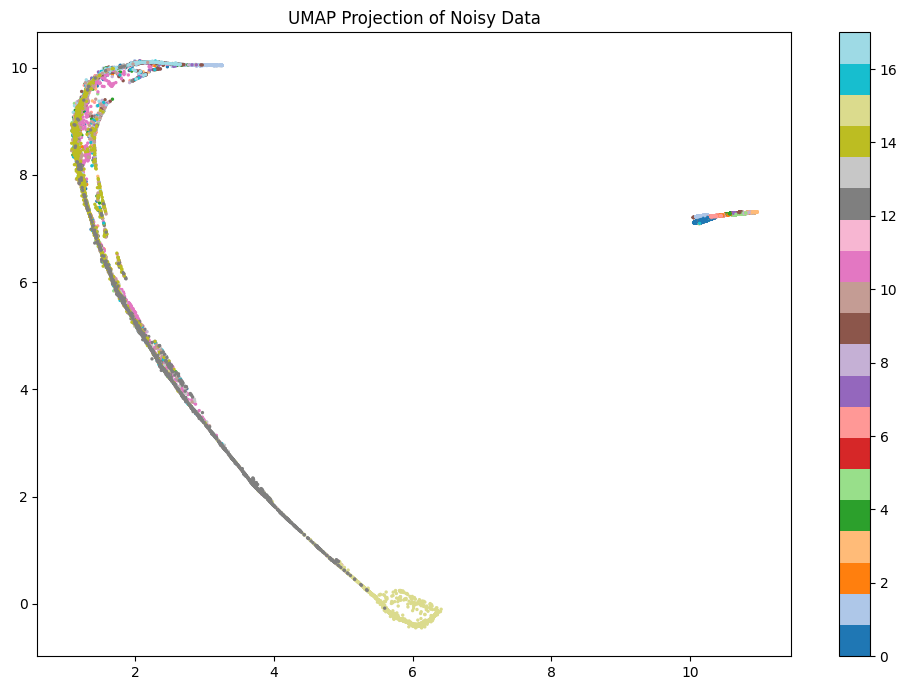

In [21]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=28*28)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=2)
plt.title("UMAP Projection of Noisy Data")
plt.colorbar()
plt.tight_layout()
plt.show()


In [31]:
# Define a bounding box for the central region (adjust as needed)
x_min, x_max = 4, 10  # X-axis range for the central cluster
y_min, y_max = 2, 6   # Y-axis range for the central cluster

# Filter points in the central region
central_region = (X_umap[:, 0] >= x_min) & (X_umap[:, 0] <= x_max) & \
                 (X_umap[:, 1] >= y_min) & (X_umap[:, 1] <= y_max)

# Get the unique classes in the central region
overlapping_classes = np.unique(y[central_region])

print(f"Classes in the overlapping region: {overlapping_classes}")
print(f"Number of overlapping classes: {len(overlapping_classes)}")

Classes in the overlapping region: []
Number of overlapping classes: 0


In [23]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [32]:
X -= X.mean(axis=0)
cov = X.T@X / X.shape[0]

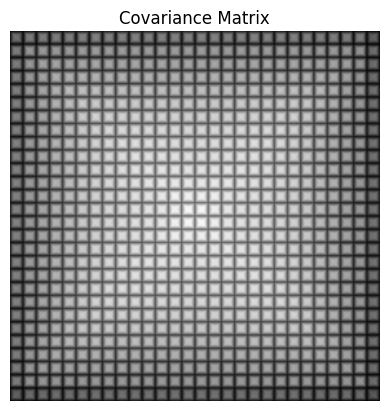

In [33]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [27]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95091485, 0.95198999, 0.95306188, 0.95414353, 0.95522194,
       0.95630685, 0.95737548, 0.95844085, 0.95949644, 0.96055529,
       0.96161741, 0.9626339 , 0.96364389, 0.96465713, 0.96566385,
       0.96666732, 0.96766753, 0.96866448, 0.96965817, 0.97060625,
       0.97155107, 0.97249264, 0.97343094, 0.97436599, 0.97529127,
       0.9762198 , 0.97715159, 0.9780736 , 0.97893698, 0.97980361,
       0.98066372, 0.98152058, 0.98237418, 0.98322452, 0.9840716 ,
       0.98491542, 0.98575599, 0.9865933 , 0.98742735, 0.9881832 ,
       0.98892929, 0.98968189, 0.99043123, 0.99117406, 0.99191362,
       0.99264993, 0.99338299, 0.99411278, 0.99483932, 0.99555933,
       0.99610016, 0.99682344, 0.99736101, 0.99789533, 0.99842638,
       0.99895418, 0.99947872, 1.        ])

In [28]:
W = eigenvectors[:, :len(eigenvectors) - len(rule)]
# W = eigenvectors
W.shape

torch.Size([784, 726])

In [29]:
new_X = W.T @ X.T 

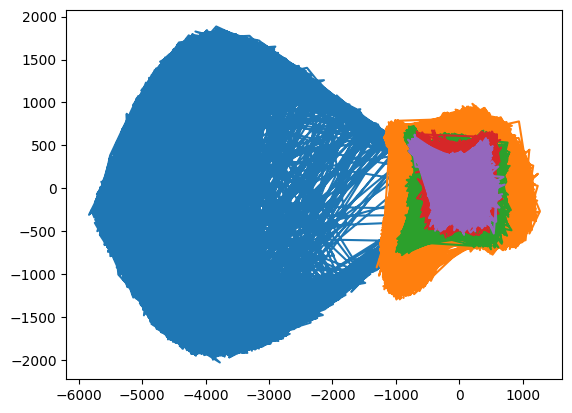

In [30]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9])
